# Interpolation

Given a discrete data set of the form $x_0, x_1, \ldots , x_n$ and $y_0, y_1, \ldots , y_n$, to determine a curve that passes through every point in the given data set and able to obtain the value of $y$ for a given value of $x$ as long as $x_0 \leq x \leq x_n$. 

Curve fitting is differnt in that the curve may or may not pass through all points of the data set.

## Polynomial Interpolation

### Lagrange's Method
$$P_n (x) = \sum_{i=0}^{n} y_i \, l_i(x)$$
where $n$ denotes the degree of the polynomial and $l_i(x)$ are the _cardinal functions_.
$$
\begin{align*}l_i(x) & = \frac{x - x_0}{x_i - x_0} \cdot \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}} \cdot \frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_n}{x_i - x_n} \\
 & = \Pi_{j=0; j \neq i}^{n} \frac{x - x_j}{x_i - x_j}, \quad i=0, 1, \ldots , n
\end{align*}$$

If $n = 1$, the interpolant is a straight line $P_1(x) = y_0 \, l_0(x) + y_1 \, l_1(x)$, where
$$
\begin{align*}
l_0(x) & = \frac{x - x_1}{x_0 - x_1} & l_1(x) = \frac{x - x_0}{x_1 - x_0}
\end{align*}
$$

If $n = 2$, the interpolant is parabolic $P_2(x) = y_0 \, l_0(x) + y_1 \, l_1(x) + y_2 \, l_2(x)$, where
$$
\begin{align*}
l_0 (x) & = \frac{x - x_1}{x_0 - x_1} \cdot \frac{x - x_2}{x_0 - x_2} \\
l_1 (x) & = \frac{x - x_0}{x_1 - x_0} \cdot \frac{x - x_2}{x_0 - x_2} \\
l_2 (x) & = \frac{x - x_0}{x_1 - x_0} \cdot \frac{x - x_1}{x_2 - x_1}
\end{align*}
$$

Cardinal functions are polynomials of degree $n$, and have the property
$$
\begin{align*}
l_i(x_j) & = \begin{cases}
0 & \text{if } i \neq j \\
1 & \text{if } i = j
\end{cases}
\end{align*}
$$

[ 0.  2.  3.]
[  7.  11.  28.]


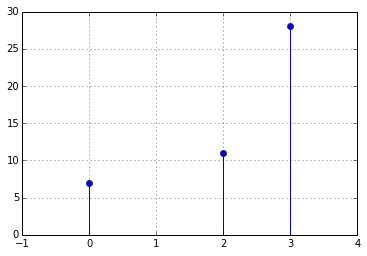

At x= 0.0 y = 7.0
At x= 2.0 y = 11.0
At x= 3.0 y = 28.0
At x= 1.0 y = 4.0


In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def lagrange(x, y, xx):
    n = len(x)  # number of data points
    if len(y) != n:
        return None

    s = 0.0
    for i in range(n):
        p = 1.0
        for j in range(n):
            if i != j:
                p *=(xx - x[j]) / (x[i] - x[j])
        s += y[i] * p
    return s

x = np.array([0, 2, 3.0])
y = np.array([7, 11, 28.0])
print x
print y

plt.stem(x, y, 'b')
plt.grid()
plt.xlim(-1, 4)
plt.show()

for xx in x:
    yy = lagrange(x, y, xx)
    print 'At x=', xx, 'y =', yy

xx = 1.0
yy = lagrange(x, y, xx)
print 'At x=', xx, 'y =', yy


### Newton's Divided Difference Method
$$P_n(x) = a_0 + (x - x_0) a_1 + (x - x_0)(x - x_1) a_2 + \cdots + (x - x_0)(x-x_1)( \cdots (x-x_n) a_n
$$
As an example, for four data points ($n=3$),
$$
\begin{align*}P_3(x) &= a_0 + (x-x_0) a_1 + (x-x_0)(x-x_1)a_2 + (x-x_0)(x-x_1)(x-x_2)a_3 \\
 & = a_0 + (x-x_0) \left\{ a_1 + (x-x_1) \left[ a_2 + (x-x_2) a_3 \right] \right\}
\end{align*}$$
This can be evaluated backwards with the following recurrence relations
$$
\begin{align*}
P_0(x) &= a_3 \\
P_1(x) &= a_2 + (x - x_2) P_0(x) \\
P_2(x) &= a_1 + (x - x_1) P_1(x) \\
P_3(x) &= a_0 + (x - x_0) P_2(x)
\end{align*}
$$
For arbitrary $n$, we have
$$
\begin{align*}
P_o(x) &= a_n \\
P_k(x) &= a_{n-k} + (x - x_{n-k}) P_{k-1}(x), \quad k = 1, 2, \ldots , n
\end{align*}
$$
The coefficients $a_i$ of $P_n$ can be obtained by forcing the polynomial to pass through each data point: $y_i = P_n(x_i), \quad i=0, 1, \ldots , n$. This yields the following simultaneous equations:
$$
\begin{align*}
y_0 &= a_0 \\
y_1 &= a_0 + (x_1 - x_0) a_1 \\
y_2 &= a_0 + (x_2 - x_0) a_1 + (x_2 - x_0)(x_2 - x_1) a_2 \\
& \vdots \\
y_n &= a_0 + (x_n - x_0) a_1 + \cdots + (x_n - x_0)(x_n - x_1) \cdots (x_n - x_{n-1}) a_n
\end{align*}
$$
Introducing divided differences
$$
\begin{align*}
\nabla y_i &= \frac{y_i - y_0}{x_i - x_0}, \quad i=1, 2, \ldots , n \\
\nabla^2 y_i &= \frac{\nabla y_i - \nabla y_1}{x_i - x_1}, \quad i=2, 3, \ldots , n \\
\nabla^3 y_i &= \frac{\nabla^2 y_i - \nabla^2 y_2}{x_i - x_2}, \quad i=3, 4, \ldots , n \\
& \vdots \\
\nabla^n y_n &= \frac{\nabla^{n-1} y_n - \nabla^{n-1} y_{n-1}}{x_n - x_{n-1}}
\end{align*}
$$
The solution of the simultaneous equations is
$$
\begin{align*}
a_0 &= y_0 \\
a_1 &= \nabla y_1 \\
a_2 &= \nabla^2 y_2 \\
& \vdots \\
a_n &= \nabla^n y_n
\end{align*}
$$

<table>
<tr>
    <td>i</td><td>$x_i$</td><td>$y_i$</td><td>$\nabla y_i$</td><td>$\nabla^2 y_i$</td><td>$\nabla^3 y_i$</td><td>$\nabla^4 y_i$</td>
</tr>
<tr>
    <td>0</td><td>$x_0$</td><td>$y_0$</td><td></td><td></td><td></td><td></td>
</tr>
<tr>
    <td>1</td><td>$x_1$</td><td>$y_1$</td><td>$\nabla y_1$</td><td></td><td></td><td></td>
</tr>
<tr>
    <td>2</td><td>$x_2$</td><td>$y_2$</td><td>$\nabla y_2$</td><td>$\nabla^2 y_2$</td><td></td><td></td>
</tr>
<tr>
    <td>3</td><td>$x_3$</td><td>$y_3$</td><td>$\nabla y_3$</td><td>$\nabla^2 y_3$</td><td>$\nabla^3 y_3$</td><td></td>
</tr>
<tr>
    <td>4</td><td>$x_4$</td><td>$y_4$</td><td>$\nabla y_4$</td><td>$\nabla^2 y_4$</td><td>$\nabla^3 y_4$</td><td>$\nabla^4 y_4$</td>
</tr>
</table>

Consider the following solved example:

<table>
<tr>
<td>$i$</td><td>$x_i$</td><td>$y_i$</td><td>$\nabla y_i$</td><td>$\nabla^2 y_i$</td><td>$\nabla^3 y_i$</td><td>$\nabla^4 y_i$</td><td>$\nabla^5 y_i$</td>
</tr>
<tr>
<td>$0$</td><td>$-2$</td><td>$-1$</td><td> </td><td> </td><td> </td><td> </td><td> </td>
</tr>
<tr>
<td>$1$</td><td>$1$</td><td>$2$</td><td>$1$</td><td> </td><td> </td><td> </td><td> </td>
</tr>
<tr>
<td>$2$</td><td>$4$</td><td>$59$</td><td>$10$</td><td>$3$</td><td> </td><td> </td><td> </td>
</tr>
<tr>
<td>$3$</td><td>$-1$</td><td>$4$</td><td>$5$</td><td>$-2$</td><td>$1$</td><td> </td><td> </td>
</tr>
<tr>
<td>$4$</td><td>$3$</td><td>$24$</td><td>$5$</td><td>$2$</td><td>$1$</td><td>$0$</td><td> </td>
</tr>
<tr>
<td>$5$</td><td>$-4$</td><td>$-53$</td><td>$26$</td><td>$-5$</td><td>$1$</td><td>$0$</td><td>$0$</td>
</tr>
</table>


Given Data
   -2.00    -1.00
    1.00     2.00
    4.00    59.00
   -1.00     4.00
    3.00    24.00
   -4.00   -53.00



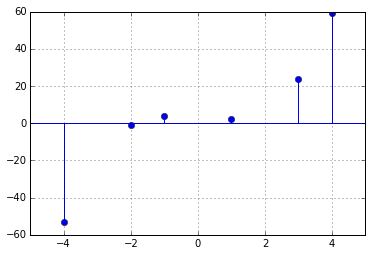

Newton Divided Difference Coefficients: [-1.  1.  3.  1.  0.  0.]

Interpolated values at points in data set
   -2.00    -1.00    -1.00
    1.00     2.00     2.00
    4.00    59.00    59.00
   -1.00     4.00     4.00
    3.00    24.00    24.00
   -4.00   -53.00   -53.00

    0.00     3.00
    1.50     3.38


In [4]:
def newton_coeff(x, y):
    m = len(x)
    if len(y) != m:
        return None
    a = y.copy()
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k-1]) / (x[k:m] - x[k-1])
    return a

def eval_poly(a, x, xx):
    n = len(x) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1, n+1):
        p = a[n-k] + (xx - x[n-k]) * p
    return p

x = np.array([-2, 1, 4, -1, 3, -4.0])
y = np.array([-1, 2, 59, 4, 24, -53.0])
print 'Given Data'
for xx, yy in zip(x, y):
    print '%8.2f %8.2f' % (xx, yy)
print

plt.stem(x, y)
plt.grid()
plt.xlim(-5, 5)
plt.axhline(0.0)
plt.show()

a = newton_coeff(x, y)
print 'Newton Divided Difference Coefficients:', a
print
print 'Interpolated values at points in data set'
for i in range(len(x)):
    print "%8.2f %8.2f %8.2f" % (x[i], eval_poly(a, x, x[i]), y[i])
print

xx = 0.0
yy = eval_poly(a, x, xx)
print '%8.2f %8.2f' % (xx, yy)
xx = 1.5
print '%8.2f %8.2f' % (xx, eval_poly(a, x, xx))

When all you want to do is to determine the interpolant at just one point, Lagrange's method serves the purpose very well. However, when you want to determine the interpolant at several points for a given data set, Lagrange's method is inefficient. In such a case, Newton's method is appropriate as it calculates the coefficients for the given set of data once, and uses them any number of times to determine the interpolant at any number of desired points.

### Neville's Method
Neville's method is well suited when you want to determine the interpolant at only one point.


In [5]:
def neville(x, y, xx):
    m = len(x)
    yy = y.copy()
    for k in range(1, m):
        yy[0:m-k] = ((xx - x[k:m])*yy[0:m-k] + (x[0:m-k] - xx) * yy[1:m-k+1]) / (x[0:m-k] - x[k:m])
    return yy[0]

x = np.array([4, 3.9, 3.8, 3.7])
y = np.array([-0.06604, -0.02724, 0.01282, 0.05383])

for i in range(len(x)):
    yy = neville(x, y, x[i])
    print '%4.1f %10.5f %10.5f' % (x[i], y[i], yy)
print

xx = neville(y, x, 0.0)  # Inverse interpolation
print 'y = 0 at x =', xx, 'Interpolated value at x=', xx, 'is', neville(x, y, xx)

 4.0   -0.06604   -0.06604
 3.9   -0.02724   -0.02724
 3.8    0.01282    0.01282
 3.7    0.05383    0.05383

y = 0 at x = 3.83170355972 Interpolated value at x= 3.83170355972 is 1.97128605479e-06


## Application - Predicting Population
As mentioned at the start, interpolation must be used only to determine the interpolant at data points that lie within the range of given data set. However, in the following application, we are attempting to predict the value at a data point outside the range of the given data set, namely year 2000 which lies outside the range 1920 to 1990.

The population (in million) of a country from 1920 to 2000 is tabulated below. Fit a 7th order polynomial to the first 8 points (1920 to 1990). Use it to compute the population in 2000 by extrapolation and compare your prediction with the actual result. Repeat the solution by using first-, second-, third- and fourth-order interpolation in 2000 based on most recent data. That is, for the linear prediction use data from 1980 and 1990, for the quadratic predction use data from 1970, 1980 and 1990, and so on. Which approach yields the best result?
<table>
<tr>
<td><b>Year</b></td><td>1920</td><td>1930</td><td>1940</td><td>1950</td><td>1960</td><td>1970</td><td>1980</td><td>1990</td><td>2000</td>
</tr>
<tr>
<td><b>Population (million)</b></td><td>106.46</td><td>123.08</td><td>132.12</td><td>152.27</td><td>180.67</td><td>205.05</td><td>227.23</td><td>249.46</td><td>281.42</td>
</tr>
</table>

1920   106.46
1930   123.08
1940   132.12
1950   152.27
1960   180.67
1970   205.05
1980   227.23
1990   249.46


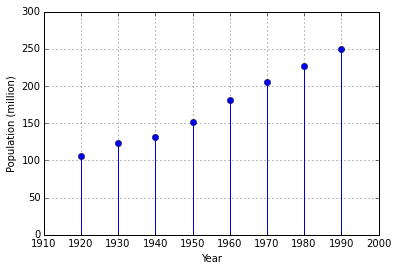


Lagrange Interpolation
7 1920 to 1990:  2000.00,   175.08,   281.42  -106.34
6 1930 to 1990:  2000.00,   223.60,   281.42   -57.82
5 1940 to 1990:  2000.00,   260.76,   281.42   -20.66
4 1950 to 1990:  2000.00,   274.42,   281.42    -7.00
3 1960 to 1990:  2000.00,   273.99,   281.42    -7.43
2 1970 to 1990:  2000.00,   271.74,   281.42    -9.68
1 1980 to 1990:  2000.00,   271.69,   281.42    -9.73

Newton Interpolation
7 1920 to 1990:  2000.00,   175.08,   281.42  -106.34
6 1930 to 1990:  2000.00,   223.60,   281.42   -57.82
5 1940 to 1990:  2000.00,   260.76,   281.42   -20.66
4 1950 to 1990:  2000.00,   274.42,   281.42    -7.00
3 1960 to 1990:  2000.00,   273.99,   281.42    -7.43
2 1970 to 1990:  2000.00,   271.74,   281.42    -9.68
1 1980 to 1990:  2000.00,   271.69,   281.42    -9.73

Neville's Method
7 1920 to 1990:  2000.00,   175.08,   281.42  -106.34
6 1930 to 1990:  2000.00,   223.60,   281.42   -57.82
5 1940 to 1990:  2000.00,   260.76,   281.42   -20.66
4 1950 to 1990:  2

In [6]:
t = np.array(range(1920, 1991, 10), dtype=float)
pop = np.array([106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46])
p2000 = 281.42

for xx, yy in zip(t, pop):
    print '%4d %8.2f' % (xx, yy)

plt.stem(t, pop)
plt.grid()
plt.xlim(1910, 2000)
plt.ylim(0, 300)
plt.xlabel('Year')
plt.ylabel('Population (million)')
plt.show()

def lagrange_interp(x, y, xstart, xx, yknown):
    x1 = x[xstart:]
    y1 = y[xstart:]
    yy = lagrange(x1, y1, xx)
    print '%4d to %4d: %8.2f, %8.2f, %8.2f %8.2f' % (int(x1[0]), int(x1[-1]), xx, yy, yknown, yy - yknown)
    return

print
print 'Lagrange Interpolation'
for i in range(0, len(t)-1):
    print len(t)-i-1,
    lagrange_interp(t, pop, i, 2000, p2000)

def newton_interp(x, y, xstart, xx, yknown):
    x1 = x[xstart:]
    y1 = y[xstart:]
    a = newton_coeff(x1, y1)
    yy = eval_poly(a, x1, xx)
    print '%4d to %4d: %8.2f, %8.2f, %8.2f %8.2f' % (int(x1[0]), int(x1[-1]), xx, yy, yknown, yy - yknown)
    return

print
print 'Newton Interpolation'
for i in range(0, len(t)-1):
    print len(t)-i-1,
    newton_interp(t, pop, i, 2000, p2000)

def neville_interp(x, y, xstart, xx, yknown):
    x1 = x[xstart:]
    y1 = y[xstart:]
    yy = neville(x1, y1, xx)
    print '%4d to %4d: %8.2f, %8.2f, %8.2f %8.2f' % (int(x1[0]), int(x1[-1]), xx, yy, yknown, yy - yknown)
    return

print
print "Neville's Method"
for i in range(0, len(t)-1):
    print len(t)-i-1,
    neville_interp(t, pop, i, 2000, p2000)

In [16]:
x = np.array([-2, 1, 4, -1, 3, -4], dtype=float)
y = np.array([-1, 2, 59, 4, 24, -53], dtype=float)
print x
print y

a = y.copy()
print a
a[1:] = (a[1:] - a[0]) / (x[1:] - x[0])
print a

a[2:] = (a[2:] - a[1]) / (x[2:] - x[1])
print a

a[3:] = (a[3:] - a[2]) / (x[3:] - x[2])
print a

a[4:] = (a[4:] - a[3]) / (x[4:] - x[3])
print a

a[5:] = (a[5:] - a[4]) / (x[5:] - x[4])
print a

[-2.  1.  4. -1.  3. -4.]
[ -1.   2.  59.   4.  24. -53.]
[ -1.   2.  59.   4.  24. -53.]
[ -1.   1.  10.   5.   5.  26.]
[-1.  1.  3. -2.  2. -5.]
[-1.  1.  3.  1.  1.  1.]
[-1.  1.  3.  1.  0. -0.]
[-1.  1.  3.  1.  0.  0.]
